In [ ]:
#hide
!pip install -Uqq fastbook
!pip install fastai
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.6MB/s 
     |████████████████████████████████| 194kB 20.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 18.9MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 40kB 7.3MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 2.6MB 21.3MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
prop = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(256, min_scale=0.7)
)


data_dir = "/content/gdrive/My Drive/fastai"
data_loader = prop.dataloaders(data_dir)
# data_loader.valid.show_batch(max_n=4, nrows=1, unique=True)




Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


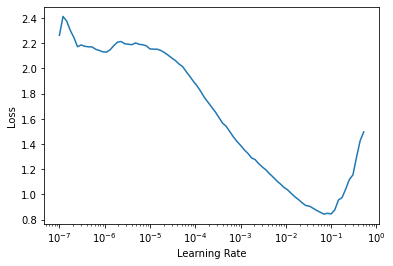

In [ ]:

learn = cnn_learner(data_loader, resnet50, metrics=error_rate)
learn.freeze()
lr_min, lr_steep = learn.lr_find()


In [ ]:
learn.fine_tune(5, base_lr=lr_steep)

epoch,train_loss,valid_loss,error_rate,time
0,1.723999,0.610794,0.276074,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.758697,0.419456,0.165644,00:13
1,0.620914,0.317088,0.128834,00:14
2,0.524815,0.301912,0.116564,00:13
3,0.458044,0.288862,0.110429,00:13
4,0.400535,0.294388,0.110429,00:13


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


/usr/local/lib/python3.6/dist-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


epoch,train_loss,valid_loss,error_rate,time
0,1.362537,0.601014,0.214724,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.482338,0.307069,0.128834,00:11
1,0.384975,0.233943,0.085890,00:11
2,0.304151,0.233336,0.085890,00:11
3,0.249499,0.224145,0.092025,00:11
4,0.211191,0.224533,0.085890,00:11


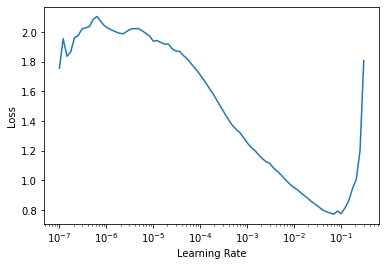

In [ ]:
learn = cnn_learner(data_loader, resnet101, metrics=error_rate).to_fp16()
lr_min, lr_steep = learn.lr_find()
learn.fine_tune(5, base_lr=lr_steep)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


/usr/local/lib/python3.6/dist-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


epoch,train_loss,valid_loss,error_rate,time
0,1.779149,0.716270,0.312883,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.920379,0.615522,0.251534,00:14
1,0.847140,0.494838,0.208589,00:14
2,0.760916,0.386442,0.171779,00:14
3,0.657638,0.315693,0.110429,00:14
4,0.581964,0.277489,0.098160,00:14
5,0.503530,0.251937,0.098160,00:14
6,0.439558,0.241179,0.067485,00:14
7,0.386305,0.234235,0.067485,00:14
8,0.345155,0.226940,0.067485,00:14
9,0.300835,0.223239,0.067485,00:14


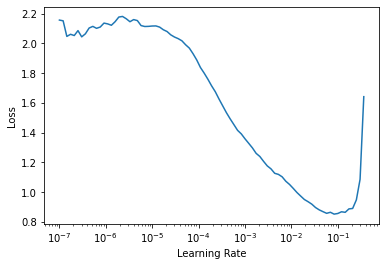

In [ ]:
learn = cnn_learner(data_loader, resnet152, metrics=error_rate).to_fp16()
lr_min, lr_steep = learn.lr_find()
learn.fine_tune(20, base_lr=lr_steep)

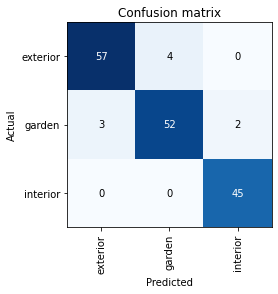

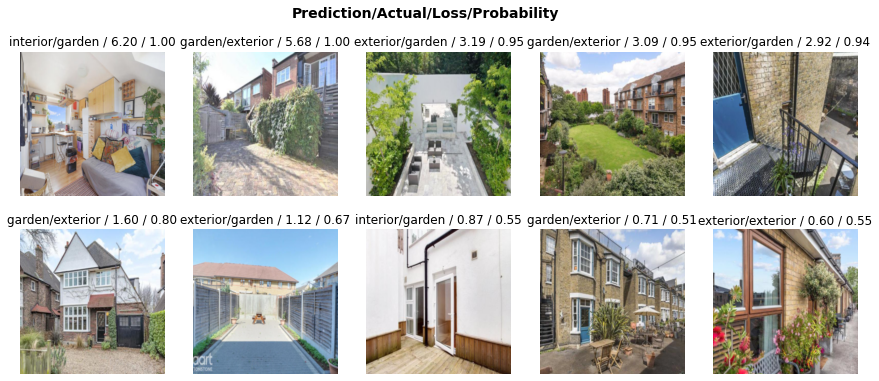

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(10, nrows=2)

In [ ]:
learn.save('cnn')

Path('models/cnn.pth')

In [ ]:
learn.path

Path('.')

In [ ]:
learn.export('rnclassifer.pkl')